In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

In [2]:
# Define a function to plot accuracy and loss

def plot_accuracy_loss(training_results): 
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')   
    plt.show()

In [3]:
# Define a function to plot model parameters

def print_model_parameters(model):
    count = 0
    for ele in model.state_dict():
        count += 1
        if count % 2 != 0:
            print ("The following are the parameters for the layer ", count // 2 + 1)
        if ele.find("bias") != -1:
            print("The size of bias: ", model.state_dict()[ele].size())
        else:
            print("The size of weights: ", model.state_dict()[ele].size())

In [4]:
# Define a function to display data

def show_data(data_sample):
    plt.imshow(data_sample.numpy().reshape(28, 28), cmap='gray')
    plt.show()

In [5]:
# Define the neural network

class Net(nn.Module):

    # constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = self.linear2(x)
        return x

In [21]:
# define the training function to train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful = {'training_loss' : [], 'validation_accuracy': []}
    for epoch in range(epochs):
        print("epoch number {0}".format(epoch+1), end='\r')
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28*28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful['training_loss'].append(loss.data.item())
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28*28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful['validation_accuracy'].append(accuracy)
    return useful

In [7]:
# Load the dataset as we want with the transform. Grayscale (since it loads RGB)
# and ToTensor (2D tensor)

transform = transforms.Compose([
    transforms.Grayscale(), # Tried to load without grayscale but it loads as RGB
    transforms.ToTensor()
    # transforms.Lambda(lambda x: x.squeeze(0)) # Remove the first dimension. The image was loaded as [1, 28, 28]
    
    ])

train_dataset = dsets.ImageFolder('./../data/MNIST/training/', transform=transform)
validation_dataset = dsets.ImageFolder('./../data/MNIST/testing/', transform=transform)

# Shuffle the dataset since it loads ordered.

def shuffle_dataset(dataset):
    # Shuffle the dataset
    dataset_size = len(dataset)
    indices = torch.randperm(dataset_size).tolist()  # Generate a list of random indices
    shuffled_dataset = torch.utils.data.Subset(dataset, indices)  # Create a shuffled subset
    return shuffled_dataset

train_dataset = shuffle_dataset(train_dataset)
validation_dataset = shuffle_dataset(validation_dataset)

In [8]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [9]:
input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

In [10]:
print_model_parameters(model)

The following are the parameters for the layer  1
The size of weights:  torch.Size([100, 784])
The size of bias:  torch.Size([100])
The following are the parameters for the layer  2
The size of weights:  torch.Size([10, 100])
The size of bias:  torch.Size([10])


In [30]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

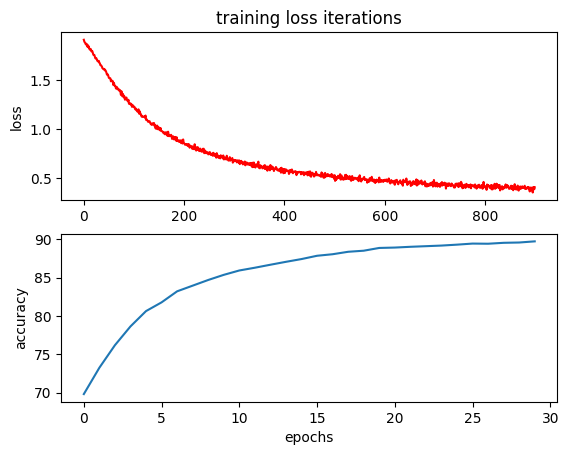

In [31]:
plot_accuracy_loss(training_results)

In [48]:
print(training_results['validation_accuracy'][-1])

89.75


tensor([4]) 9
probability of class  0.6480809450149536


/var/folders/tj/v0cd2dr50lbdrs6j5gy7s00r0000gn/T/ipykernel_69771/864028233.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print("probability of class ", F.softmax(z).max().item())


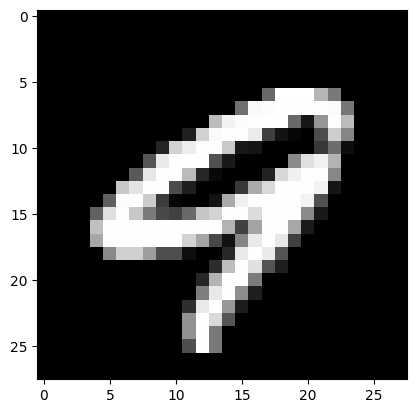

tensor([9]) 4
probability of class  0.4317249357700348


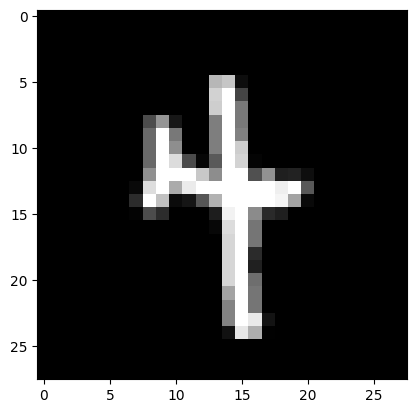

tensor([0]) 6
probability of class  0.7493020296096802


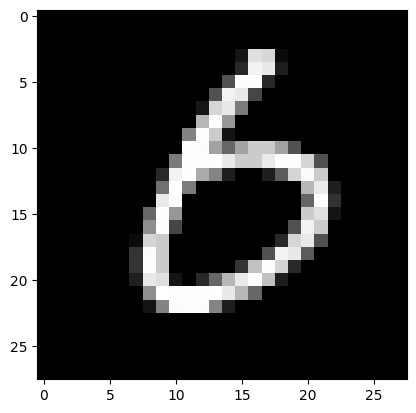

tensor([0]) 2
probability of class  0.7324947118759155


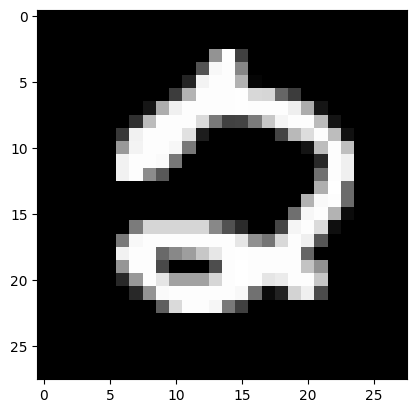

tensor([2]) 8
probability of class  0.288584440946579


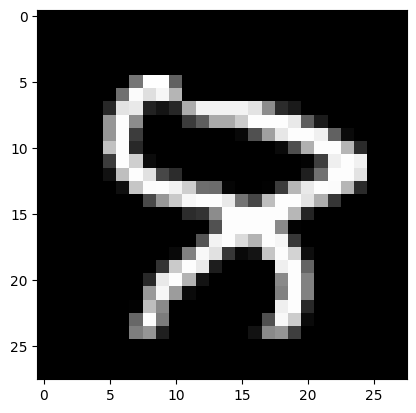

In [46]:
# Plot the first five misclassified samples

count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _,yhat = torch.max(z, 1)
    if yhat != y:
        print(yhat, y)
        print("probability of class ", F.softmax(z).max().item())
        show_data(x)
        count += 1
    if count >= 5:
        break